<a href="https://colab.research.google.com/github/brimarcosano/CSC560_Demo/blob/main/Face_Markup_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project C: Expression Identification using Face Images**

###**Tom Birmingham, Mohammed Mahmud, & Brianna Marcosano**
...
#### CSC581 Computational Intelligence
#### Southern Connecticut State Univeristy
#### Summer 2022

# About
---
## Purpose
The purpose of this project is to measure the performance of five classifiers in Artificial/Computational Intelligence when performing human expression identification (natural, smile, or anger). 

## Dataset
The following experiments use the AR Face Database created by Aleix Martinez and Robert Benavente at the Computer Vision Center at the Autonomous University of Barcelona (http://www2.ece.ohio-state.edu/~aleix/ARdatabase.html). Of this data, 80% of the will be used for training and 20% will be used for testing. 

## Classifiers
The performance of each classifier will be measured in terms of accuracy, precision, and recall rate. The following classifiers are tested:
1.   K-Nearest Neighbors
2.   Artificial Neural Network
3.   Naïve Bayes
4.   Decision Tree
5.   Support Vector Machine

## Solution
First, AR Face Database is imported from Google Drive. Then feature extraction from the points in each face image is performed. Next, each classifier is trained and tested.

## Results
Please see our final report for results and anaylsis: [Project C: Face Markup Project CSC581 - Google Docs](https://docs.google.com/document/d/16ezHk6AsGXAaJAzE5p9WlZVqd-hpDlFnomzNs6HdlSg/edit?usp=sharing)


# Import Python Libraries
---
The following libraries must be imported to support the proceeding code blocks. . .

In [ ]:
from google.colab import drive
import sklearn
from glob import glob
import pandas as pd
import numpy as np
from math import sqrt, pow
from sklearn import preprocessing

# Importing AR Face Markup Database
---
In order to import the data, the Face Markup AR Database was uploaded to Google Drive. Using the Google Colab library, Google Drive is mounted and the ***./Face Markup AR Database*** directory is accessed. All samples are stored in the ***./points_22*** directory.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Create Symbolic Link to ./points_22 directory
! ln -s /content/drive/'My Drive'/'Face Markup AR Database'/'Face Markup AR Database'/points_22

# Display the contents of points_22
! ls points_22 

Mounted at /content/drive
m-001  m-014  m-027  m-040  m-053  m-066  w-003  w-017	w-030  w-043  w-056
m-002  m-015  m-028  m-041  m-054  m-067  w-004  w-018	w-031  w-044  w-057
m-003  m-016  m-029  m-042  m-055  m-068  w-005  w-019	w-032  w-045  w-058
m-004  m-017  m-030  m-043  m-056  m-069  w-007  w-020	w-033  w-046  w-059
m-005  m-018  m-031  m-044  m-057  m-070  w-008  w-021	w-034  w-047  w-060
m-006  m-019  m-032  m-045  m-058  m-071  w-009  w-022	w-035  w-048
m-007  m-020  m-033  m-046  m-059  m-072  w-010  w-023	w-036  w-049
m-008  m-021  m-034  m-047  m-060  m-073  w-011  w-024	w-037  w-050
m-009  m-022  m-035  m-048  m-061  m-074  w-012  w-025	w-038  w-051
m-010  m-023  m-036  m-049  m-062  m-075  w-013  w-026	w-039  w-052
m-011  m-024  m-037  m-050  m-063  m-076  w-014  w-027	w-040  w-053
m-012  m-025  m-038  m-051  m-064  w-001  w-015  w-028	w-041  w-054
m-013  m-026  m-039  m-052  m-065  w-002  w-016  w-029	w-042  w-055


# Feature Extraction
---
Feature extraction is performed on the dataset before training. Feature Extraction takes raw data as input and outputs a dataframe as a table with features for all samples.

To extract the features, we must iterate over each sample. There are 136 persons in the database (76 men and 60 woman). For each person, iterate over samples natural, smile, and anger expressions. For each sample, extract the following seven features:


1.   Eye length ratio
2.   Eye distance ratio
3.   Nose ratio
4.   Lip size ratio
5.   Lip length ratio
6.   Eyebrow length ratio
7.   Aggressive ratio

Feature definitions are as follows:


In [ ]:
# Eye Length Ratio | length of eye over distance between points 8 and 13
def eye_length_ratio():

    right_eye_width = calculateDistance(10, 9)
    left_eye_width = calculateDistance(12, 11)
    face_width = calculateDistance(13, 8)
    
    # right eye is longer
    if right_eye_width >= left_eye_width:
      ratio = left_eye_width / face_width
    
    # left eye is longer
    else:
      ratio = right_eye_width / face_width
    
    return float('{0:.3g}'.format(ratio))


# Eye Distance Ratio | distance between center of two eyes over width of face
def eye_distance_ratio():
    eye_distance = calculateDistance(1, 0)
    face_width = calculateDistance(8, 13)

    ratio = eye_distance / face_width

    return float('{0:.3g}'.format(ratio))


# Nose Ratio | distance between the nostrils over width of the face
def nose_ratio():
    nostril_width = calculateDistance(16, 15)
    face_width = calculateDistance(21, 20)

    ratio = nostril_width / face_width

    return float('{0:.3g}'.format(ratio))

# Lip Size Ratio | width of the mouth over the height of the mouth
def lip_size_ratio():
    mouth_width = calculateDistance(3, 2)
    mouth_height = calculateDistance(18, 17)

    ratio = mouth_width / mouth_height

    return float('{0:.3g}'.format(ratio))


# Lip Length Ratio | width of the mouth over width of the face
def lip_length_ratio():
    mouth_width = calculateDistance(3, 2)
    face_width = calculateDistance(21, 20)

    ratio = mouth_width / face_width

    return float('{0:.3g}'.format(ratio))


# Eyebrow Length Ratio | width of the eyebrow over width of the face
def eyebrow_ratio():
    right_eyebrow_width = calculateDistance(5, 4)
    left_eyebrow_width = calculateDistance(7, 6)
    face_width = calculateDistance(13, 8)

    # right eyebrow is longer
    if right_eyebrow_width >= left_eyebrow_width:
        ratio = right_eyebrow_width / face_width
    
    # left eyebrow is longer
    else:
        ratio = left_eyebrow_width / face_width

    return float('{0:.3g}'.format(ratio))


# Aggressive Ratio | height of the eyes over width of face
def aggressive_ratio():
    eye_height = calculateDistance(19, 10)
    face_width = calculateDistance(21, 20)

    ratio = eye_height / face_width

    return float('{0:.3g}'.format(ratio))


# Euclidian Distance Calculation | Helper Function
def calculateDistance(p1, p2):
    global points

    x1 = float(points.x[p1])
    y1 = float(points.y[p1])
    x2 = float(points.x[p2])
    y2 = float(points.y[p2])

    distance = sqrt(pow(x2-x1, 2) + pow(y2-y1, 2))

    
    return distance


# getFeatures returns all features for the current file
def getFeatures(sampleId):
    featureList = [sampleId, eye_length_ratio(), eye_distance_ratio(), nose_ratio(),
                lip_size_ratio(), lip_length_ratio(), eyebrow_ratio(),
                aggressive_ratio()]

    return featureList

Now iterate over all the files in points_22 to process samples for neutral expression, smile, and anger. The result is a dataframe table (df) . . .

In [ ]:
# Output the number of files in points_22
files = glob(r'points_22/**/*.pts', recursive=True)
# print("Total File(s)", len(files))
# print("NOTE: only processing samples for natural, smile, and anger expressions\n")

# Global variables
points = []
features = []

# For all files in points_22
for file in files:

  # Extract the sampleId (ie. m-001-01)
  sampleId = file.split('/')[2].split('.')[0]

  # If sample is of Neutral expression, Smile or Anger
  if sampleId[-1] in ['1', '2', '3']:

    # get data from .pts file
    dataframe = pd.DataFrame(pd.read_csv(file))

    # build x[] and y[] arrays for this sample
    raw_data = dataframe.iloc[2:24]
    df = pd.DataFrame(raw_data)
    points = df['version: 1'].str.split(' ', expand=True)
    points.columns=['x', 'y']
    points.reset_index(drop=True, inplace=True)

    # get features for this sample and append to features array
    features.append(getFeatures(sampleId))

# final dataframe for classification training and testing
df = pd.DataFrame(features, columns=['Sample ID', 'Eye Lenght Ratio',
                                     'Eye Dist Ratio', 'Nose Ratio',
                                     'Lip Size Ratio', 'Lip Length Ratio',
                                     'Brow Length Ratio', 'Aggressive Ratio'])

In [ ]:
# test output from Feature Extraction
df

,Sample ID,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,m-002-01,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,m-002-02,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,m-002-03,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,m-001-02,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,m-001-03,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,w-056-03,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,w-057-03,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,w-058-03,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,w-059-03,0.228,0.471,0.178,4.40,0.448,0.372,0.918


# Classifiers
---
The following classifiers are trained and tested, and the output of each classifier is compared. . .

## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
df

,Sample ID,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,m-002-01,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,m-002-02,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,m-002-03,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,m-001-02,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,m-001-03,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,w-056-03,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,w-057-03,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,w-058-03,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,w-059-03,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
# creating new data formatting set for SVM
knn_X_data =  df.iloc[:, 1:8]

gender_x_data_list = []

for gender_x_data in df['Sample ID']:
    thisXgenderData = ""
    if gender_x_data.__contains__('-01'):
        thisXgenderData = '1'
    elif gender_x_data.__contains__('-02'):
        thisXgenderData = '2'
    elif gender_x_data.__contains__('-03'):
        thisXgenderData = '3'
    
    gender_x_data_list.append(thisXgenderData)
    
df_for_knn = pd.DataFrame(gender_x_data_list,  columns =['Expression'])
xDataKNN = pd.concat([df_for_knn, knn_X_data], axis=1)
xDataKNN

,Expression,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,1,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,2,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,3,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,2,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,3,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,3,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,3,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,3,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,3,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
# iloc[rows, cols]
x_prime_knn =  xDataKNN.iloc[:, 0:8]
x_prime_knn = x_prime_knn.reset_index(drop=True)

y_data_knn = x_prime_knn.iloc[:, 0:1]
y_data_knn = y_data_knn.reset_index(drop=True)

In [ ]:
# Dividing data. 20% test data
X_train, X_test, y_train, y_test = train_test_split(x_prime_knn, y_data_knn, test_size = 0.20)

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and predicting
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

# Predictions on test data
pred = classifier.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[22  2  0]
 [ 3 30  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        24
           2       0.94      0.88      0.91        34
           3       0.94      1.00      0.97        17

    accuracy                           0.92        75
   macro avg       0.92      0.93      0.93        75
weighted avg       0.92      0.92      0.92        75



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


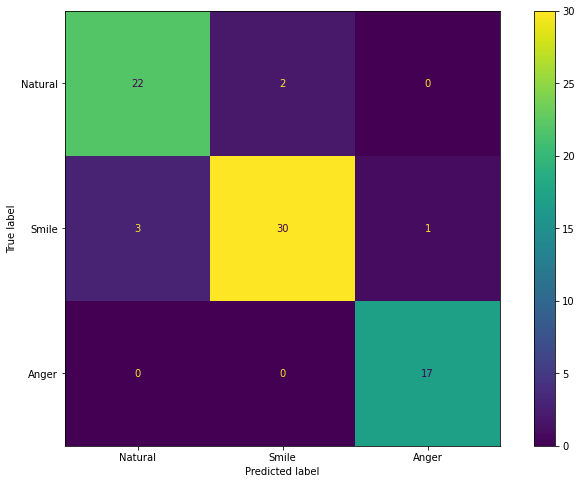

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Natural', 'Smile', 'Anger'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
# Training and predicting
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

# Predictions on test data
pred = classifier.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[22  2  0]
 [ 3 30  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        24
           2       0.94      0.88      0.91        34
           3       0.94      1.00      0.97        17

    accuracy                           0.92        75
   macro avg       0.92      0.93      0.93        75
weighted avg       0.92      0.92      0.92        75



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# F score
# Checking performance on the training set
print('KNN accuracy - Training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
#Checking performance on the test set
print('KNN accuracy - Testing set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

KNN accuracy - Training set: 0.95
KNN accuracy - Testing set: 0.92


In [ ]:
acc = accuracy_score(y_test, pred)
print(acc)

0.92


In [ ]:
# Finding best value for K with GridSearchCV
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=1))
])
pred = pipeline.fit(X, y).predict(X)
mod = GridSearchCV(estimator=pipeline,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv = 10, 
                 scoring = 'accuracy')
mod.fit(X, y);
print (mod.best_score_)
print (mod.best_params_)
print (mod.best_estimator_)

0.9666666666666668
{'model__n_neighbors': 8}
Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=8))])


## Artificial Neural Network (ANN)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# creating new set for ANN 
ann_X_data =  df.iloc[:, 1:8]

gender_x_data_list = []

for gender_x_data in df['Sample ID']:
    thisXgenderData = ""
    if gender_x_data.__contains__('-01'):
        thisXgenderData = '1'
    elif gender_x_data.__contains__('-02'):
        thisXgenderData = '2'
    elif gender_x_data.__contains__('-03'):
        thisXgenderData = '3'
    
    gender_x_data_list.append(thisXgenderData)
  
df_for_ann = pd.DataFrame(gender_x_data_list,  columns =['Expression'])

In [ ]:
xDataAnn = pd.concat([df_for_ann, ann_X_data], axis=1)
xDataAnn

,Expression,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,1,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,2,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,3,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,2,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,3,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,3,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,3,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,3,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,3,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
x_prime =  xDataAnn.iloc[:, 0:8]
x_prime = x_prime.reset_index(drop=True)
# x_prime
y_data = xDataAnn.iloc[:, 0:1]
y_data = y_data.reset_index(drop=True)
# y_data
# The preprocessing.scale() algorithm puts your data on one scale.
# This is helpful with largely sparse datasets. In simple words, your data is vastly spread out.
x_ann = preprocessing.scale(x_prime)
print(x_ann.shape)
X_train, X_test, y_train, y_test = train_test_split(x_ann, y_data, test_size = 0.20, random_state = 42, shuffle=True)
len(X_train),  len(X_test), len(y_train), len(y_test)

(373, 8)


(298, 75, 298, 75)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(hidden_layer_sizes=(100, 30, 10, ),
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='adaptive', 
                    learning_rate_init=0.002, 
                    power_t=0.5, 
                    max_iter=500,
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False,
                    warm_start=False,
                    momentum=0.9, 
                    nesterovs_momentum=True, 
                    early_stopping=True, 
                    validation_fraction=0.1, 
                    beta_1=0.9,
                    beta_2=0.999, 
                    epsilon=1e-08, 
                    n_iter_no_change=10, 
                    max_fun=15000)

In [ ]:
clf.fit(X_train, y_train)
len(X_test), len(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(75, 75)

In [ ]:
P_data = clf.predict(X_test)
P_data_df = pd.DataFrame(P_data, columns = ['Predict Data'])
P_data_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
the_final_result = pd.concat([P_data_df, y_test], axis=1)
# Final result of ANN 
# total test data size
len(P_data_df), len(y_test)

(75, 75)

In [ ]:
accuracy_score(the_final_result["Predict Data"], the_final_result["Expression"], normalize=True)

0.9866666666666667

In [ ]:
print(classification_report(y_test, P_data))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        33
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        20

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



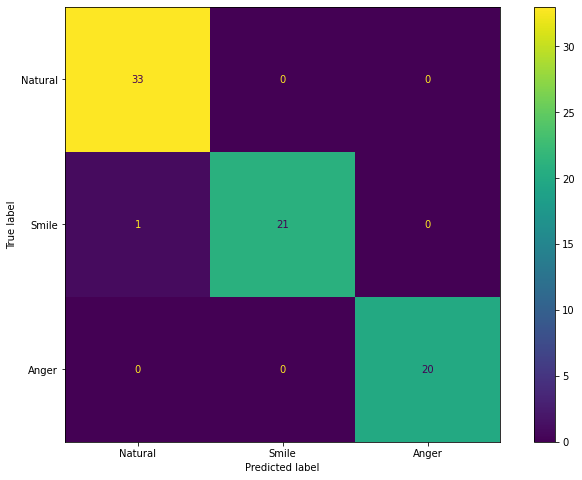

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, P_data)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Natural', 'Smile', 'Anger'])
cmp.plot(ax=ax)

plt.show();

## Naïve Bayes

In [ ]:
# imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# creating new data formatting set for SVM
svm_X_data =  df.iloc[:, 1:8]

gender_x_data_list = []

for gender_x_data in df['Sample ID']:
    thisXgenderData = ""
    if gender_x_data.__contains__('-01'):
        thisXgenderData = '1'
    elif gender_x_data.__contains__('-02'):
        thisXgenderData = '2'
    elif gender_x_data.__contains__('-03'):
        thisXgenderData = '3'
    
    gender_x_data_list.append(thisXgenderData)
    
df_for_ann = pd.DataFrame(gender_x_data_list,  columns =['Expression'])
xDataNB = pd.concat([df_for_ann, svm_X_data], axis=1)
xDataNB

,Expression,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,1,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,2,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,3,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,2,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,3,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,3,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,3,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,3,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,3,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
x_prime_NB = xDataNB.iloc[:, 0:8]
x_prime_NB = x_prime_NB.reset_index(drop=True)

y_data_NB = x_prime_NB.iloc[:, 0:1]
y_data_NB = y_data_NB.reset_index(drop=True)
# y_data

# The preprocessing.scale() algorithm puts your data on one scale.
# This is helpful with largely sparse datasets. In simple words, your data is vastly spread out.
x_nb = preprocessing.scale(x_prime_NB)
y_nb = preprocessing.scale(y_data_NB)
# x_nb.shape

In [ ]:
x_prime_NB = x_prime_NB.to_numpy()

In [ ]:
y_data_NB = y_data_NB.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_prime_NB, y_data_NB, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(298, 75, 298, 75)

In [ ]:
gnb = GaussianNB()

Y_P = gnb.fit(X_train, y_train)

Y_gnb_score = gnb.predict_proba(X_test)

# reformat the results for output
a = []
for row in Y_gnb_score:
  if row[0] == 1:
    a.append(['1'])
  elif row[1] == 1:
    a.append(['2'])
  elif row[2] == 1:
    a.append(['3'])
    
Y_gnb_score = a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Naive Bayes score: ", gnb.score(X_test, y_test))

Naive Bayes score:  1.0


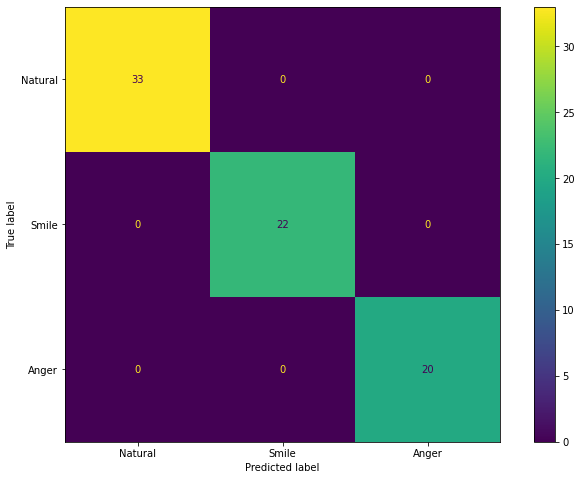

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(Y_gnb_score, y_test)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Natural', 'Smile', 'Anger'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
import numpy as np

print("Naive Bayes score: ", y_pred.score(X_test, y_test))

## Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
# creating new data formatting set for Decision Tree
svm_X_data =  df.iloc[:, 1:8]

gender_x_data_list = []
sampleId[-1]
for gender_x_data in df['Sample ID']:
    thisXgenderData = ""
    if gender_x_data.__contains__('-01'):
        thisXgenderData = '1'
    elif gender_x_data.__contains__('-02'):
        thisXgenderData = '2'
    elif gender_x_data.__contains__('-03'):
        thisXgenderData = '3'
    
    gender_x_data_list.append(thisXgenderData)
    
df_for_dt = pd.DataFrame(gender_x_data_list,  columns =['Expression'])
xDataDT = pd.concat([df_for_dt, svm_X_data], axis=1)
xDataDT

,Expression,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,1,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,2,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,3,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,2,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,3,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,3,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,3,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,3,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,3,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
x_prime_dt =  xDataDT.iloc[:, 1:8]
x_prime_dt = x_prime_dt.reset_index(drop=True)

y_data_dt = xDataDT.iloc[:, 0:1]
y_data_dt = y_data_dt.reset_index(drop=True)
# y_data

# The preprocessing.scale() algorithm puts your data on one scale.
# This is helpful with largely sparse datasets. In simple words, your data is vastly spread out.
x_dt = preprocessing.scale(x_prime_dt)
x_dt.shape

(373, 7)

In [ ]:
y_data_dt

,Expression
0,1
1,2
2,3
3,2
4,3
...,...
368,3
369,3
370,3
371,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_dt, y_data_dt, test_size = 0.20, random_state=42, shuffle=True)
len(X_train),  len(X_test), len(y_train), len(y_test)

(298, 75, 298, 75)

In [ ]:
y_train, y_test

(    Expression
 192          3
 75           2
 84           2
 361          3
 16           2
 ..         ...
 71           2
 106          1
 270          2
 348          1
 102          3
 
 [298 rows x 1 columns],     Expression
 327          1
 33           1
 15           3
 314          3
 57           1
 ..         ...
 94           1
 195          2
 311          2
 292          1
 347          3
 
 [75 rows x 1 columns])

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", 
                             splitter="best",
                             min_samples_split=9, 
                             min_samples_leaf=18,
                             random_state=62)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6133333333333333


In [ ]:
clf.get_n_leaves()

13

In [ ]:
feature_cols = [ 'Eye Lenght Ratio',
                'Eye Dist Ratio', 'Nose Ratio',
                'Lip Size Ratio', 'Lip Length Ratio',
                'Brow Length Ratio', 'Aggressive Ratio']

In [ ]:
y_test,y_train

(    Expression
 327          1
 33           1
 15           3
 314          3
 57           1
 ..         ...
 94           1
 195          2
 311          2
 292          1
 347          3
 
 [75 rows x 1 columns],     Expression
 192          3
 75           2
 84           2
 361          3
 16           2
 ..         ...
 71           2
 106          1
 270          2
 348          1
 102          3
 
 [298 rows x 1 columns])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.61      0.62        33
           2       0.64      0.82      0.72        22
           3       0.53      0.40      0.46        20

    accuracy                           0.61        75
   macro avg       0.60      0.61      0.60        75
weighted avg       0.61      0.61      0.60        75



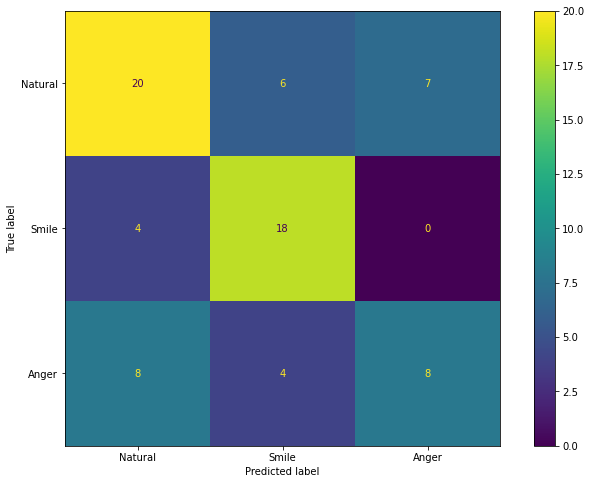

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Natural', 'Smile', 'Anger'])
cmp.plot(ax=ax)

plt.show();

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = feature_cols, 
                class_names= ['Natural', 'Smile', 'Azznger'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import preprocessing

In [ ]:
# creating new data formatting set for SVM
svm_X_data =  df.iloc[:, 1:8]

gender_x_data_list = []

for gender_x_data in df['Sample ID']:
    thisXgenderData = ""
    if gender_x_data.__contains__('-01'):
        thisXgenderData = '1'
    elif gender_x_data.__contains__('-02'):
        thisXgenderData = '2'
    elif gender_x_data.__contains__('-03'):
        thisXgenderData = '3'
    
    gender_x_data_list.append(thisXgenderData)
    
df_for_ann = pd.DataFrame(gender_x_data_list,  columns =['Expression'])
xDataSVM = pd.concat([df_for_ann, svm_X_data], axis=1)
xDataSVM

,Expression,Eye Lenght Ratio,Eye Dist Ratio,Nose Ratio,Lip Size Ratio,Lip Length Ratio,Brow Length Ratio,Aggressive Ratio
0,1,0.208,0.480,0.135,3.29,0.413,0.374,0.982
1,2,0.223,0.488,0.136,3.30,0.486,0.368,0.972
2,3,0.209,0.483,0.134,3.76,0.398,0.370,0.926
3,2,0.200,0.428,0.147,3.39,0.469,0.398,0.955
4,3,0.210,0.434,0.155,3.89,0.456,0.415,0.960
...,...,...,...,...,...,...,...,...
368,3,0.233,0.476,0.144,3.06,0.464,0.364,0.972
369,3,0.225,0.447,0.143,3.00,0.437,0.361,0.956
370,3,0.192,0.484,0.137,3.87,0.455,0.366,0.956
371,3,0.228,0.471,0.178,4.40,0.448,0.372,0.918


In [ ]:
x_prime_svm =  xDataSVM.iloc[:, 0:8]
x_prime_svm = x_prime_svm.reset_index(drop=True)

y_data_svm = x_prime_svm.iloc[:, 0:1]
y_data_svm = y_data_svm.reset_index(drop=True)
# y_data

# The preprocessing.scale() algorithm puts your data on one scale.
# This is helpful with largely sparse datasets. In simple words, your data is vastly spread out.
x_svm = preprocessing.scale(x_prime_svm)
x_prime_svm.shape

(373, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_svm, y_data_svm, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.05, C=0.1).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
poly_pred = rbf.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  94.67
F1 (Polynomial Kernel):  94.62


In [ ]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94        33
           2       0.95      0.86      0.90        22
           3       1.00      1.00      1.00        20

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



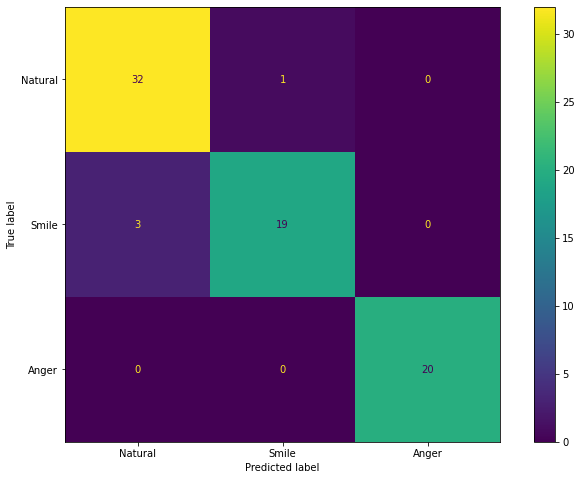

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, poly_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Natural', 'Smile', 'Anger'])
cmp.plot(ax=ax)

plt.show();